In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Beschreibende Statistik
## Übersicht
- Warum Statistik

#### Lagemaß
#### <span style="color:blue">Streuung</span>
#### <span style="color:blue">Graphiken</span>
#### Abhängigkeit

Bei gleichem Lagemaß können sich die zugrundeliegenden Daten unterscheiden:

In [3]:
'''survey for age of visitors in theme park'''
a = np.array([15, 16, 64, 15, 66, 66, 15, 16])
b = np.array([34, 33, 34, 34, 36])
c = np.array([8, 68, 50, 48, 4, 23, 13, 27, 79, 22])
print('average age in group A: {:.1f}  B: {:.1f}  C: {:.1f} years'
      .format(a.mean(), b.mean(), c.mean()))

average age in group A: 34.1  B: 34.2  C: 34.2 years


average age in group A: 34.1  B: 34.2  C: 34.2 years


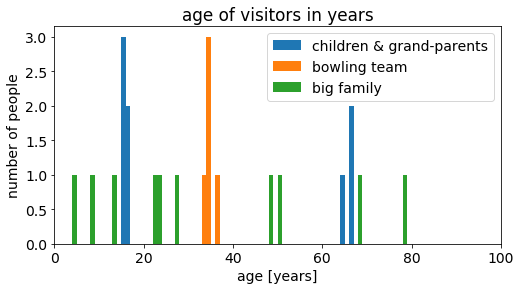

In [4]:
'''same mean, different width'''
print('average age in group A: {:.1f}  B: {:.1f}  C: {:.1f} years'
      .format(a.mean(), b.mean(), c.mean()))
bins = range(80)
plt.figure(figsize=(8, 4))
plt.hist(a, bins=bins, label='children & grand-parents')
plt.hist(b, bins=bins, label='bowling team')
plt.hist(c, bins=bins, label='big family')
plt.title('age of visitors in years')
plt.xlabel('age [years]')
plt.ylabel('number of people')
plt.xlim(0, 100)
plt.legend();

# Streuungsmaße
#### Spannweite
Der Bereich vom kleinsten zum größten Wert
$$R = x_{max}-x_{min}$$

In [5]:
print('range of age in \ngroup A: {:2d}  \ngroup B: {:2d}  \ngroup C: {:2d}  '
      .format(a.max()-a.min(), b.max()-b.min(), c.max()-c.min()))

range of age in 
group A: 51  
group B:  3  
group C: 75  


## Empirische Varianz
<div class="alert alert-block alert-success">
$$s^2 = \frac{1}{N} \sum_{i=1}^{N} \left( x_i-\bar{x} \right)^2$$
</div>

### Verschiebungssatz
$$s^2 = \overline{x^2} - \overline{x}^2$$

#### Beweis: [ÜA]

In [6]:
'''calculate mean and variance "on the fly"'''
np.random.seed(654321)
xx = 2*np.random.random(size=10) -1. # randomly sampled -1 .. +1
print(xx)
xxsum = 0               # initialize the sum
xxqsum = 0              #            the square-sum
n = 0                   #            the number of measures
for xi in xx:           # after every step: tell me mean and standard deviation
    xxsum += xi
    xxqsum += xi**2
    n += 1              # to distinguish from i, even if nx = 1 + i
    print('{:2d} th step has mean {:5.2f} and std {:5.2f}'.
          format(n, xxsum/n, np.sqrt(xxqsum/n-(xxsum/n)**2)))

[-0.53601194  0.46506068  0.92618017  0.38634326  0.71896458  0.67740375
 -0.84280437 -0.85675517 -0.93527115  0.93672658]
 1 th step has mean -0.54 and std  0.00
 2 th step has mean -0.04 and std  0.50
 3 th step has mean  0.29 and std  0.61
 4 th step has mean  0.31 and std  0.53
 5 th step has mean  0.39 and std  0.50
 6 th step has mean  0.44 and std  0.47
 7 th step has mean  0.26 and std  0.63
 8 th step has mean  0.12 and std  0.69
 9 th step has mean  0.00 and std  0.73
10 th step has mean  0.09 and std  0.75


### Stichprobenvarianz 
Die Stichprobenvarianz ist leicht unterschiedlich definiert durch
$$s^2 = \frac{1}{N-1} \sum_{i=1}^{N} \left( x_i-\bar{x} \right)^2$$

#### Hintergrund:
- Die Anzahl der Freiheitsgrade ist $N-1$, da Nebenbedingung $\sum_{i=1}^N(x_i-\bar{x})=0$
- Für N=1 ist die Varianz nicht definiert 
    - anstatt $0$ bei der empirischen Varianz
- Für große N ist sie asymptotisch gleich

### Eigenschaften
Unter der linearen Abbildung $$y_i = ax_i+b$$ ergibt sich
$$s_y^2 = a^2s_x^2$$

## Standardabweichung
$$s = +\sqrt{s^2}$$

Unter der linearen Abbildung $$y_i = ax_i+b$$ ergibt sich
$$s_y = |a|\;s_x$$

In [7]:
'''example with three groups visiting Volksfest:'''
print('std. dev. of age in A: {:.1f}  B: {:.1f}  C: {:.1f}'
      .format(a.std(), b.std(), c.std()))

std. dev. of age in A: 24.2  B: 1.0  C: 24.4


# Histogramme
Viele Daten: von der Strichliste zum Histogramm

### Diskrete Ereignisse
Beispiel: Münze, Würfel, Karten, Körpergröße in 5cm-Schritten, ...

### kontinuierliche Ereignisse
Körpergröße, Temperatur

#### Klasseneinteilung 
führt wieder zurück auf den diskreten Fall

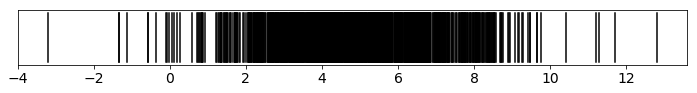

In [8]:
'''thousand random numbers'''
np.random.seed(9876543)
xmany = np.random.normal(loc=5., scale=2., size=1000)
xmany[0] = -3.2                     # extra values for later
xmany[1] = 12.8
plt.figure(figsize=(12,1))
plt.plot(2*[xmany], [0, 1], 'k-')
plt.yticks([]);

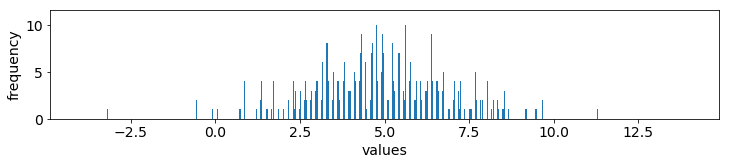

In [9]:
plt.figure(figsize=(12, 2))
bins = np.linspace(-4, 14, (14+4)*40+1)
hist_full = plt.hist(xmany, bins, rwidth=0.4)
plt.xlabel('values')
plt.ylabel('frequency');

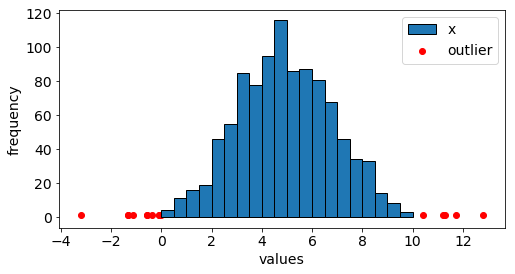

In [10]:
'''information from histogram'''
plt.figure(figsize=(8, 4))
bins = np.linspace(0,10,21)
hist_20 = plt.hist(xmany, bins, label='x', edgecolor='black')
outlier = xmany[np.logical_or(xmany<0, xmany>10)]
plt.scatter(outlier, np.ones_like(outlier), color='red', label='outlier') 
plt.xlabel('values')
plt.ylabel('frequency')
plt.legend();

### Klasseneinteilung
Sinnvoll für Informationsgehalt.<br>
Faustregel: 
- bis zu 20 Klassen
- Anzahl Klassen $\;n_{\text{bins}} \equiv \sqrt n_{\text{data}}$ (für $n_{\text{data}}\;$ bis 100 bzw. 400)
- Klassenbreite $\;w_{\text{bins}} = \frac {3.49 \cdot \sigma} {\sqrt[3]{n_{\text{data}}}}\;$ (Scotts Regel)<br> David W. Scott: On optimal and data-based histogram. Biometrika **3** 66, 1979, S. 605–610

Dabei **Breite** der Klassenbalken
- möglichst konstant
- sonst kodiere Anzahl in *Fläche* (nicht Höhe)

Optimal histogram has 20 bins, each 0.693 wide in the range-2.03 .. 11.83


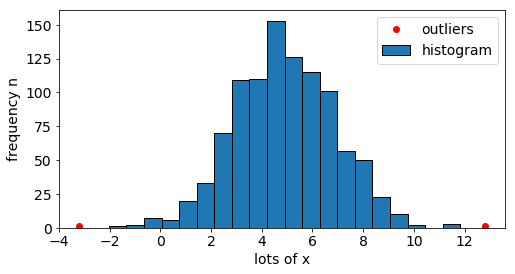

In [11]:
'''optimal histogram according to Scott-s rule'''
plt.figure(figsize=(8, 4))
n = int(np.round(np.sqrt(min(400, xmany.shape[0]))))
# print('optimal number of bins = {:.0f}'.format(n))
w = 3.49*xmany.std()/xmany.shape[0]**0.3333333333333
# print('optimal bin size = {:.3f}'.format(w))
xstart = xmany.mean() - n/2.*w
xend = xmany.mean() + n/2.*w
print('Optimal histogram has {} bins, each {} wide in the range{} .. {}'
      .format(n, np.round(w, decimals=3), np.round(xstart, decimals=2),
              np.round(xend, decimals=2)))
bins_opt = np.linspace(xstart, xend, n+1) # number of bin-edges within range
hist_opt = plt.hist(xmany, bins_opt, label='histogram', edgecolor='black');

xoutliers = xmany[np.logical_or(xmany>xend, xmany<xstart)]
youtliers = np.ones_like(xoutliers)
plt.plot(xoutliers, youtliers, 'ro', label='outliers')
plt.legend(loc='upper right')
plt.xlabel('lots of x')
plt.ylabel('frequency n');

### Information
- Häufigste Werte: "Modus"
- Ausreisser
- Mittelwert (=Schwerpunkt)
- Wertebereich
- Form der Verteilung

## Modus

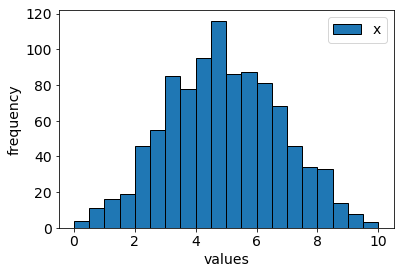

In [12]:
'''once again the histogram with 20 bins'''
bins = np.linspace(0, 10, 21)
hist_20 = plt.hist(xmany, bins, edgecolor='black', label='x') # show histogram (again)
frequencies = hist_20[0]            # first sub-array contains frequencies
borders = hist_20[1]                # 2nd sub-array contains bin borders
fmax = max(frequencies)             # maximum frequency
imax = np.argmax(frequencies)       # ... and its location 
xlower = borders[imax]              # start of max-bin
xhigher = borders[imax+1]           # ... and end 
plt.xlabel('values')
plt.ylabel('frequency')
plt.legend(loc='upper right');

In [13]:
print(hist_20)

(array([  4.,  11.,  16.,  19.,  46.,  55.,  85.,  78.,  95., 116.,  86.,
        87.,  81.,  68.,  46.,  34.,  33.,  14.,   8.,   3.]), array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]), <a list of 20 Patch objects>)


The modus of 'hist20' is 116.0 values in the bin number 9
  ranging from 4.50 to 5.00


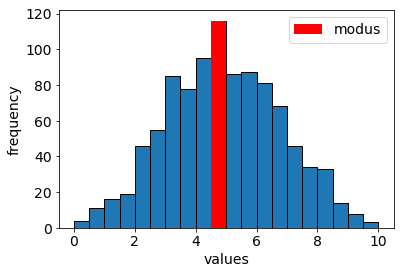

In [14]:
'''show Modus'''
hist_20 = plt.hist(xmany, bins, edgecolor='black') # show histogram (again)
frequencies = hist_20[0]               # first sub-array contains frequencies
borders = hist_20[1]                   # 2nd sub-array contains bin borders
fmax = max(frequencies)                # maximum frequency
imax = np.argmax(frequencies)          # ... and its location 
xlower = borders[imax]                 # start of max-bin
xhigher = borders[imax+1]              # ... and end 
print("The modus of 'hist20' is {} values in the bin number {}".format(fmax, imax)) 
print("  ranging from {:.2f} to {:.2f}".format(xlower, xhigher))  # highlight the modus-bin
plt.bar(x=xlower, width=(xhigher-xlower), bottom=0, height=fmax, color='red',
                                    label='modus', align='edge')
plt.xlabel('values')
plt.ylabel('frequency')
plt.legend(loc='upper right');

In [15]:
from matplotlib import image as mpi         # image related routines

img = mpi.imread('data/gabor.png')          # read image data from file
imgvector3D = np.array(img)                 # convert colors to values in matrix
# select color red only,  round from 0..1 -> 0..255 integers 
x = np.rint(255*imgvector3D[:,:,0].flatten()).astype(int)

In [16]:
'''Modus from Gabor-patch image'''
mybins = np.linspace(-0.5, 256.5, 257+1)
b, v = np.histogram(x, bins=mybins)
print(v[124:134])
print(b[124:133])
xm = np.argmax(b)
print('the modus of x is {} (with {} values between{} and {})'
                              .format(xm, b[xm], v[xm], v[xm+1]))

[123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5 132.5]
[ 68  84 107 107 116  82  89  90  78]
the modus of x is 128 (with 116 values between127.5 and 128.5)


# Quantile
<img src="images/011_Histogramm.png" width="25%">
Grenzwert, vor dem der Anteil (das Quantum) 
an Datenwerten liegt.

### Quartile
- Unteres Quartil $x_{0.25}$ : 25% und
- Oberes Quartil $x_{0.75}$ : 75% der Werte
- Median entspricht dem 50% Quartil

####  Interquartils-Abstand
$d_Q = x_{0.75} - x_{0.25}$

Ein Streuungsmaß, robust gegen Ausreißer

### Perzentile
- 5%-Perzentil: niedrigste 5% der Werte
- 95%-Perzentil: ohne oberste 5% der Werte

Quantile sind einfach abzulesen aus der kumulativen Verteilungsfunktion:

# Empirische kumulative Verteilungsfunktion F(x)

- Relative Häufigkeiten $h_i = \frac{n_i}{N}$
    - beispielsweise aus einem gebinnten Histogramm
- Reihenfolge gemäß Wert beibehalten 
- aufstapeln

histogram [ 4. 11. 16. 19. 46.] ... [33. 14.  8.  3.]
cumulated [ 4. 15. 31. 50. 96.] ... [960. 974. 982. 985.]


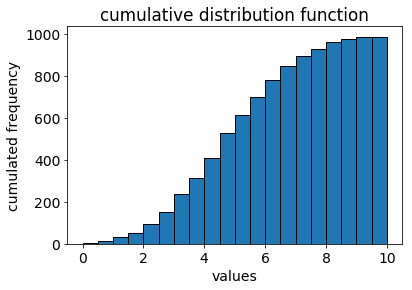

In [17]:
'''make a cumulative histogram cdf'''
hist_cumul = plt.hist(xmany, bins=np.linspace(0, 10, 21), cumulative=True,
                      edgecolor='black')
plt.title('cumulative distribution function')
print('histogram {} ... {}'.format(hist_20[0][:5], hist_20[0][-4:]))
print('cumulated {} ... {}'.format(hist_cumul[0][:5], hist_cumul[0][-4:]))
plt.xlabel('values')
plt.ylabel('cumulated frequency');

 5% percentile = 1.72 ... 95% percentile = 8.15


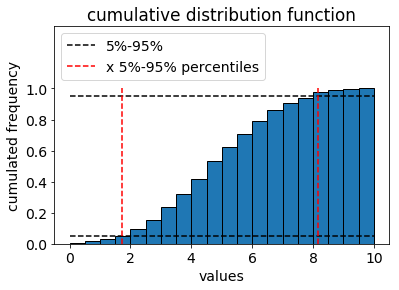

In [18]:
'''calculate quantiles'''
hist_cumul = plt.hist(xmany, bins=np.linspace(0, 10, 21), cumulative=True,
                      density=True, edgecolor='black')
plt.title('cumulative distribution function')
plt.ylim(0.0, 1.4)
plt.yticks(list(np.arange(0.0, 1.01, 0.2)))
x05, x95 = np.percentile(xmany,  (5, 95))
print(' 5% percentile = {:.2f} ... 95% percentile = {:.2f}'.format(x05, x95))
plt.plot([0, 10], 2*[.05], 'k--', label='5%-95%')
plt.plot([0, 10], 2*[.95], 'k--')
plt.plot(2*[x05], [0, 1], 'r--', label='x 5%-95% percentiles')
plt.plot(2*[x95], [0, 1], 'r--')
plt.xlabel('values')
plt.ylabel('cumulated frequency')
plt.legend(loc='upper left');

### Schnelles Ablesen der Information:
- Lage: Median, (Modus)
- Bereich: Quartile, Perzentile
- Form der Verteilung: S-Kurve
    - wenn Verteilung *ein* Maximum hat ("unimodal")

> - Modus: 增长最大的
> - Media: 中位数


# Kumulierter Mittelwert
## Arithmetisches Mittel

$$\begin{aligned}
\bar{x} &=\frac{1}{N}\sum_{i=1}^{N}x_i \\
    \approx \bar{x'}&=\frac{1}{\sum_{k=1}^{N_k}h_k}\sum_{k=1}^{N_k}h_k(x_k)\cdot x_k
\end{aligned}$$

# Varianz


$$\sigma^2=\frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})^2$$
$$\approx{\sigma'}^2=\frac{1}{\sum_{k=1}^{N_k}h_k-1}\sum_{k=1}^{N_k}h_k(x_k)\cdot (x_k-\bar{x})^2$$

## Standardabweichung
$$s=\sqrt{\sigma^2}$$ 
$${s'}=\sqrt{\bar{\sigma'}^2}$$

# Graphische Darstellung

## Fehlerbalken
- arithmetischer Mittelwert als Symbol
    - Siehe http://matplotlib.org/api/markers_api.html
- Fehlerbalken +/-Standardabweichung $\sigma$
- Ausreißer als Sterne

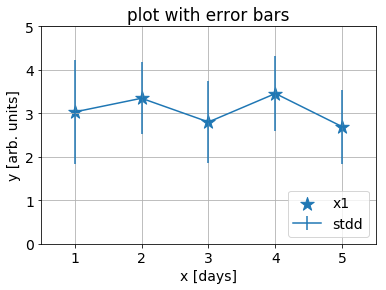

In [19]:
'''data graph typical in science
   error bars are standard deviations
'''
N = 5 
x = 1 + np.arange(N)                            # fixed x values
y = 3 + np.random.randn(N, 20)                  # 20 random y values for each x
plt.axis([0.5, 5.5, -0, 5.])                    # range of plot
plt.errorbar(x, np.mean(y, axis=1), yerr=np.std(y, axis=1), label='stdd')  
plt.scatter(x, np.mean(y, axis=1), marker='*', s=200, label='x1');  
plt.title('plot with error bars')
plt.xlabel('x [days]')
plt.ylabel('y [arb. units]')
plt.grid(b=True, which=u'major', axis=u'both')
plt.legend(loc='lower right');

### Gute Praxis
- Achsen beschriften: $\qquad$ `xlabel`, `ylabel`
- *ehrliche* Achsen
    - $0$ mit einbeziehen, wenn absolute Zahlen
    - sonst deutlich kennzeichnen (Lücke)
    - entsprechende Zahlen bzw. tickmarks: $\qquad$ `xaxis.set_ticklabels`
    - sinnvollen Bereich: $\qquad$ `axis`
- Überschrift: $\qquad$ `title`
    - in Veröffentlichungen Bildunterschrift mit Text; keine Überschrift
- Graphen beschriften:  $\qquad$ `label` und `legend`
- deutlich unterscheiden (auch für schwarz-weiß-Druck)
    - Symbole: $\qquad$ `o` $\quad$ `.` $\quad$ `,` $\quad$ `p` $\quad$ `<` $\quad$ ... 
    - Linienstil:  $\qquad$ `-` $\quad$ `--` $\quad$ `..` $\quad$ `-.` $\quad$...
    - Farbe wenn nötig
- nicht überfrachten
- manchmal hilfreich
    - Gitterlinien: $\qquad$ `grid`
    - Spiegelstriche: $\qquad$ `ax.tick_params(axis='y', direction='out')` und `ax.yaxis.tick_left()`

## Box-Plot
- Median als Strich
- Größe der Box:
    - Quartile $Q_{1/4}\dots Q_{3/4}$ 
- Länge der Striche: 
    - $Q_{1/4}-\frac{3}{2}\cdot (Q_{3/4}-Q_{1/4}) \;\dots\; Q_{3/4}+\frac{3}{2}\cdot (Q_{3/4}-Q_{1/4})$
    - Merkregel: Werte innerhalb "$\pm 100\%$"-Quartile
- Ausreißer als Sterne $+$

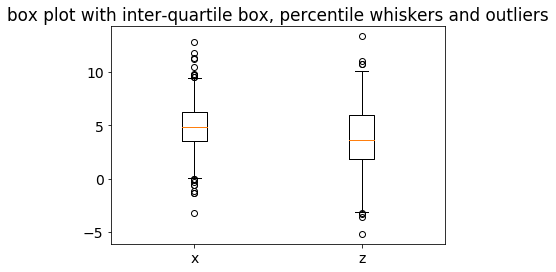

In [20]:
'''data graph with boxes and whiskers show inter-quartile-distances
'''
np.random.seed(9876543)
zmany = np.random.normal(loc=4., scale=3., size=400)# another data set
data = [xmany, zmany]                               # combine 2 data sets
plt.boxplot(data, labels=['x', 'z'], whis=[1, 99])  # name labels; 1%-99% percentiles
plt.title('box plot with inter-quartile box, percentile whiskers and outliers');

    plt.boxplot?

## Violinen-Plot

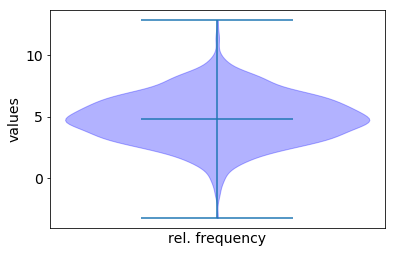

In [21]:
vp = plt.violinplot(xmany, showmedians=True)
vp['bodies'][0].set_color('blue')
plt.ylabel('values')
plt.xlabel('rel. frequency')
plt.xticks([]);                    # off, numbers of no meaning here

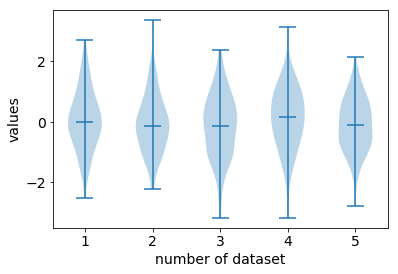

In [22]:
xx = np.random.normal(size=(5, 100))            # draw 5x100 values into 2D vector
plt.violinplot([x for x in xx], showmedians=True)
plt.ylabel('values')
plt.xlabel('number of dataset');

# Fragen?

# Vergleich zweier Stichproben
- Kennwerte
- Histogramm-Stapel
- kumulierte Verteilung

x mean = 4.90  std = 1.99
z mean = 3.84  std = 2.91


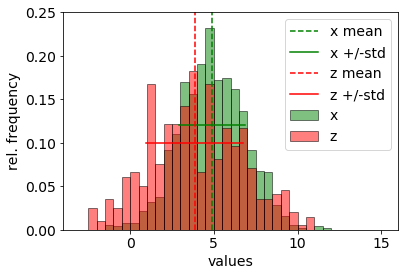

In [23]:
'''compare characteristic numbers / histograms of two distributions'''
bins = np.linspace(-3, 12, 31)                         # half steps
xmean = xmany.mean()
zmean = zmany.mean()
xstd = np.std(xmany)
zstd = np.std(zmany)
plt.axis([-4, 16, 0.0, 0.25])
print('x mean = {:.2f}  std = {:.2f}'.format(xmean, xstd))
plt.hist(xmany, bins=bins, color='green', density=True, edgecolor='black',
         label='x', alpha=.5)   # 1st histogram x, shine through
print('z mean = {:.2f}  std = {:.2f}'.format(zmean, zstd))
plt.hist(zmany, bins=bins, color='red', density=True, edgecolor='black',
         label='z', alpha=.5)   # 2nd histogram z, shine through
plt.plot(2*[xmean], [0, .25], 'g--', label='x mean')
plt.plot([xmean-xstd, xmean+xstd], [.12, .12], 'g-', label='x +/-std')
plt.plot(2*[zmean], [0, .25], 'r--', label='z mean')
plt.plot([zmean-zstd, zmean+zstd], [.1, .1], 'r-', label='z +/-std')
plt.xlabel('values')
plt.ylabel('rel. frequency')
plt.legend();

x median = 4.83  z median = 3.65


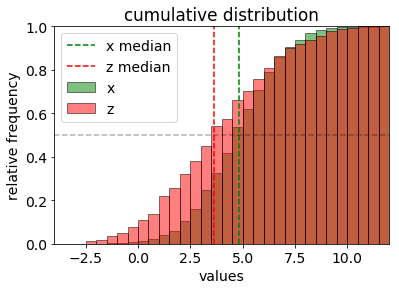

In [24]:
'''two distributions
   culmulative & normalized for better comparison
'''
xmedn = np.median(xmany)
zmedn = np.median(zmany)
print('x median = {:.2f}  z median = {:.2f}'.format(xmedn, zmedn))
plt.hist(xmany, bins=bins, color='green', density=True, edgecolor='black',
         cumulative=True,
         label='x', alpha=.5)   # 1st histogram x, cumulative density
plt.hist(zmany, bins=bins, color='red', density=True, edgecolor='black',
         cumulative=True,
         label='z', alpha=.5)   # 2nd histogram z, cumulative density
plt.title('cumulative distribution')
plt.xlabel('values')
plt.ylabel('relative frequency')
plt.plot(2*[xmedn], [0, 1.0], 'g--', label='x median')
plt.plot(2*[zmedn], [0, 1.0], 'r--', label='z median')
plt.plot([-4, 12], 2*[0.5], 'k--', alpha=.3)
plt.axis([-4, 12, 0., 1.])
plt.legend(loc='upper left');

## QQ-Plot
Gegenüberstellung der **Q**uantile

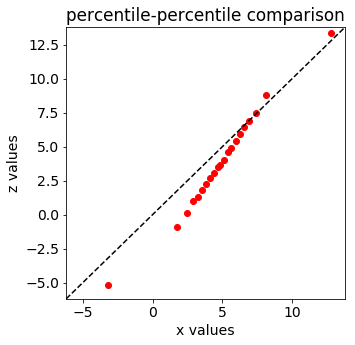

In [26]:
'''compare two distributions by percentiles'''
percentiles = np.linspace(0, 100, 20+1)     # 5% steps
percx = np.percentile(xmany, percentiles)
percz = np.percentile(zmany, percentiles)
fig = plt.figure(figsize=(5, 5))
plt.plot(percx, percz, 'ro')
diag = (np.min((xmany.min(), zmany.min()))-1, np.max((xmany.max(), xmany.max()))+1)
plt.plot(diag, diag, 'k--')
plt.xlabel('x values')
plt.ylabel('z values')
plt.xlim(diag)
plt.ylim(diag)
plt.title('percentile-percentile comparison');

# Wertebereiche
- Nominal
    - Bsp: Münze: Kopf/Zahl, gezogene Farbe
- ordinale Daten
    - Bsp: Schadensklasse, Zufriedenheit "sehr, ja, nein, garnicht"
    - Kategorien
- Diskrete Daten
    - Bsp: gewürfelte Zahl, Alter
- Kontinuerliche Daten
    - Bsp: Temperatur, Alter, 
    - prozentuale Werte

### Weitere Unterscheidung für nominale und ordinale Daten:
- dichotom/binär/binomial
- polytom/multinomial

Mittels Klasseneinteilung diskretisieren und in Histogramm darstellen.

# Zusammenfassung Kennzahlen
### Lageparameter
- Median
- Modus
- Arithmetisches Mittel
- Harmonisches Mittel, ... 
- $\Rightarrow$ (wichtigste) erste Kennzahl

### Streuung, Breite der Verteilung:
- Wertebereich Min-Max
- Standardabweichung
- Quartile
- Perzentile
- $\Rightarrow$ weitere Kennzahl(en) beschreiben die Streuung

### Ausblick: Form der Verteilung

In [27]:
'''Python reports some main parameters'''
# import scipy.stats
print('mean = {:.2f}  median = {:.2f}'
      .format(xmany.mean(), np.median(xmany))) 
print('standard deviation = {:.2f}'
      .format(xmany.std()))
print('quartile range = {:.2f} to {:.2f}'
      .format(np.percentile(xmany, 25), np.percentile(xmany, 75) ))
print('1% - 99% range = {:.2f} to {:.2f}'
      .format(np.percentile(xmany,  1), np.percentile(xmany, 99) ))

mean = 4.90  median = 4.83
standard deviation = 1.99
quartile range = 3.53 to 6.27
1% - 99% range = 0.05 to 9.41


# Zusammenfassung Graphik

- Mittelwert und Streuung - "Fehlerbalken-Diagramm"
- Boxplot
- Violinenplot
- Histogramm
- kumulierte Verteilungsfunktion


# Ausblick
- mehrdimensionale Daten
- Schließende Statistik arbeitet mit Wahrscheinlichkeiten
- Stochastische Modelle

# Fragen?